레이블이 필요하지 않으며 정답이 없는 상태에서 훈련시키는 방식

|구분          |군집                     |차원축소            |
|--------------|-------------------------|--------------------|
|목표          |데이터 그룹화            |데이터 간소화       |
|주요 알고리즘 |K-평균 군집화            |주성분분석(PCA)     |
|예시          |사용자의 관심사에 따라   |- 데이터 압축       |
|              |그룹화하여 마케팅에 활용 |- 중요한 속성 도출  |

# 1. K-평균 군집화
: 주어진 데이터셋을 이용하여 몇 개의 클러스터를 구성할지 사전에 알 수 있을 때 사용하면 유용
1. 중심정 선택 : 랜덤하게 초기 중심점을 선택
2. 클러스터 할당 : 중심점과 개별 데이터 간의 거리를 측정한 후 가까운 중심점을  기준으로 데이터 할당.
3. 새로운 중심점 선택
4. 범위 확인 : 선택된 중심점에 더 이상의 변화가 없다면 진행을 멈추고 변화가 있다면 2~3과정을 반복

- 다음과 같은 상황에서는 원하는 결과와 다르게 발생할 수 있으므로 사용하지 않는 것이 좋다
    - 데이터가 비선형일 때
    - 군집 크기가 다를 때
    - 군집마다 밀집도의 거리가 다를 때

In [1]:
#라이브러리 호출
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#상품에 대한 연 지출 데이터 호출
data = pd.read_csv("sales data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
categorical_features = ['Channel','Region'] #명목형 데이터
continuous_features = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'] #연속형데이터

for col in categorical_features : 
    dummies = pd.get_dummies(data[col], prefix=col)#명목형 데이터는 get_dummies()를 사용하여 숫자 0과 1로 변환
    data = pd.concat([data, dummies],axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [6]:
#데이터 전처리(스케일링)
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

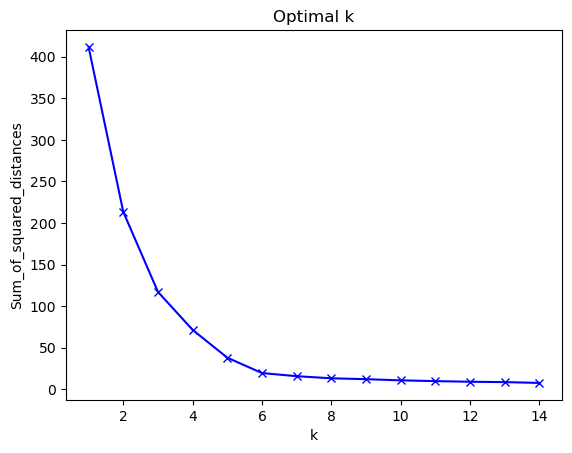

In [7]:
#적당한 K값 추출
Sum_of_squared_distances = [] #거리제곱의 합(SSD)
K = range(1,15) #1부터 14 까지 적용
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

$SSD = \sum_{x,y} (I_1 (x,y)-I_2 (x,y))^2$

# 2. 밀도기반 군집 분석
1단계. 엡실론 내 점 개수 확인 및 중심점 결정<br>2단계. 군집 확장<br>3단계. 1~2단계 반복<br>4단계. 노이즈 정의

# 3. 주성분 분석(PCA)
: 데이터의 특성변수가 너무 많을 때 특성을 두세 개 정도로 압축해서 시각화여 살펴보고 싶을 때 유용

- 데이터들의 분포 특성을 잘 설명하는 벡터 두 개 선택
- 벡터 두 개를 위한  적정한 가중치를 찾을 때 까지 학습을 진행


```python
pca = decomposition.PCA(n_components=1)
pca_x = pca.fit_transform(x_std)

result = pd.DataFrame(pca_x, columns=['dog'])
result['y-axis'] = 0.0
result['label'] = Y

sns.Implot('dog','y-axis', data=result, fit_reg=False, scatter_kws={"s":50}, hue='label');
```

In [8]:
#라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN #밀도 기반 군집 분석
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [9]:
#데이터 정제
X = pd.read_csv('credit card.csv')
X = X.drop('CUST_ID', axis = 1)
X.fillna(method = 'ffill',inplace=True) #결측값을 앞의 값으로 채울 때 사용
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [11]:
#데이터 전처리 및 데이터를 2차원으로 차원 축소
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #평균이 0, 표준편차가 1이 되도록 데이터 크기를 조정

X_normalized = normalize(X_scaled) #데이터가 가우스 분포를 따르도록 정규화
X_normalized  = pd.DataFrame(X_normalized) #넘파일 배열을 데이터 프레임으로 변환

pca = PCA(n_components=2) #2차원으로 차원 축소 선언
X_principal = pca.fit_transform(X_normalized) #차원축소
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330634  0.268880
3 -0.481657 -0.097611
4 -0.563512 -0.482506


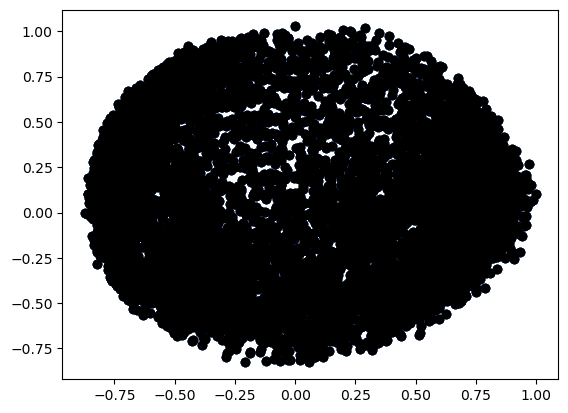

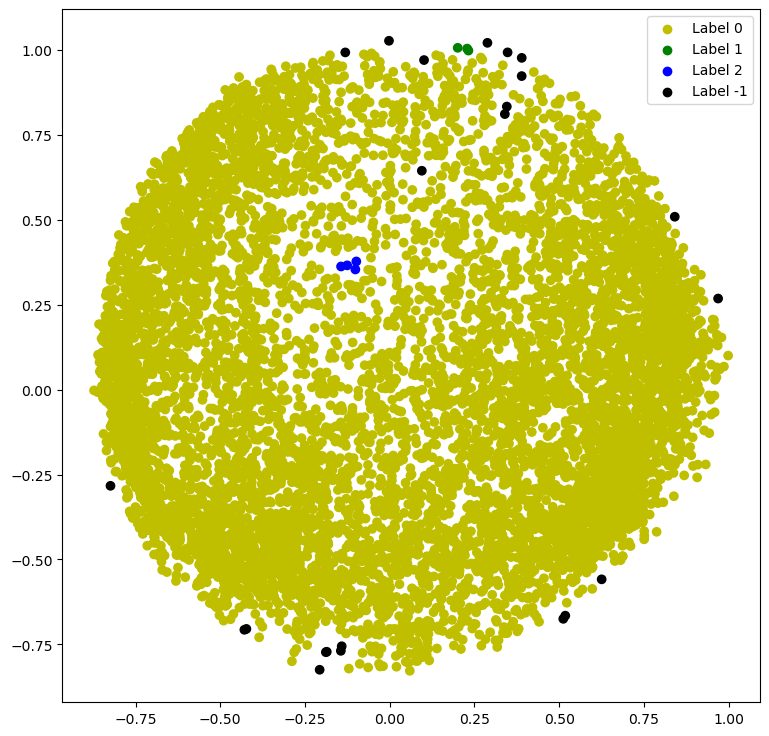

In [13]:
#DBSCAN 모델 생성 및 결과의 시각화
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)
labels = db_default.labels_

colours = {}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels] #각 데이터 포인트에 대한 색상 벡터 변경

r=plt.scatter(X_principal['P1'], X_principal['P2'], color = 'y');
g=plt.scatter(X_principal['P1'], X_principal['P2'], color = 'g');
b=plt.scatter(X_principal['P1'], X_principal['P2'], color = 'b');
k=plt.scatter(X_principal['P1'], X_principal['P2'], color = 'k');
#plot 범례 구성

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)

plt.legend((r,g,b,k), ('Label 0', 'Label 1','Label 2', 'Label -1'))
plt.show()